# Deep Learning for Business Applications course

## TOPIC 6: Hugging Face Hub for Computer Vision. Zero-Shot Image Classification

### 1. Libraries

In [2]:
!pip install transformers

  Using cached transformers-4.46.3-py3-none-any.whl.metadata (44 kB)
  Using cached huggingface_hub-0.26.2-py3-none-any.whl.metadata (13 kB)
  Using cached tokenizers-0.20.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
  Using cached safetensors-0.4.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.8 kB)
  Using cached fsspec-2024.10.0-py3-none-any.whl.metadata (11 kB)
Using cached transformers-4.46.3-py3-none-any.whl (10.0 MB)
Using cached huggingface_hub-0.26.2-py3-none-any.whl (447 kB)
Using cached safetensors-0.4.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (435 kB)
Using cached tokenizers-0.20.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.0 MB)
Using cached fsspec-2024.10.0-py3-none-any.whl (179 kB)
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2022.11.0
    Uninstalling fsspec-2022.11.0:
      Successfully uninstalled fsspec-2022.11.0

[notice] A new release of pip is

In [3]:
# you need to downgrade PyTorch for GPU usage
# because our CUDA drivers for GPU are old
# so uncomment lines below if you are in
# the GPU environment

!pip uninstall -y torch torchvision
!pip install torch==2.0.1 torchvision==0.15.2

Found existing installation: torch 2.4.1
Uninstalling torch-2.4.1:
  Successfully uninstalled torch-2.4.1
Found existing installation: torchvision 0.19.1
Uninstalling torchvision-0.19.1:
  Successfully uninstalled torchvision-0.19.1
  Using cached torch-2.0.1-cp310-cp310-manylinux1_x86_64.whl.metadata (24 kB)
  Using cached torchvision-0.15.2-cp310-cp310-manylinux1_x86_64.whl.metadata (11 kB)
  Using cached nvidia_cuda_nvrtc_cu11-11.7.99-2-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu11-11.7.99-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cuda_cupti_cu11-11.7.101-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu11-8.5.0.96-2-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu11-11.10.3.66-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cufft_cu11-10.9.0.58-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu1

In [4]:
import os
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from transformers import CLIPProcessor, CLIPModel, utils

# check if GPU available
# (works in GPU environment only)
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('device available:', DEVICE)

# to get rid off warnings
os.environ["TOKENIZERS_PARALLELISM"] = 'false'
# env variable to set path to download models
os.environ['HF_HOME'] = '/home/jovyan/dlba/topic_06/cache/'

/opt/conda/lib/python3.10/site-packages/transformers/utils/generic.py:482: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/opt/conda/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/opt/conda/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/opt/conda/lib/python3.10/site-packages/transformers/utils/generic.py:339: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
2024-11-25 07:19:00.942978: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AV

device available: cpu


/opt/conda/lib/python3.10/site-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/opt/conda/lib/python3.10/site-packages/transformers/utils/generic.py:339: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(


In [5]:
!df -h | grep dev

tmpfs                                      64M     0   64M   0% /dev
/dev/vdd                                   12G   11G  1.6G  87% /home/jovyan
/dev/vda2                                  95G   54G   38G  59% /etc/hosts
shm                                        64M  4.0K   64M   1% /dev/shm


In [6]:
!rm -rf ~/.cache/huggingface/hub
!rm -rf /home/jovyan/dlba/topic_06/cache/hub

### 2. Model

[CLIP model](https://huggingface.co/openai/clip-vit-base-patch16) was developed by researchers at OpenAI.

In [7]:
model_name = 'openai/clip-vit-base-patch16'
model = CLIPModel.from_pretrained(model_name)
processor = CLIPProcessor.from_pretrained(model_name)

config.json:   0%|          | 0.00/4.10k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/599M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/599M [00:00<?, ?B/s]

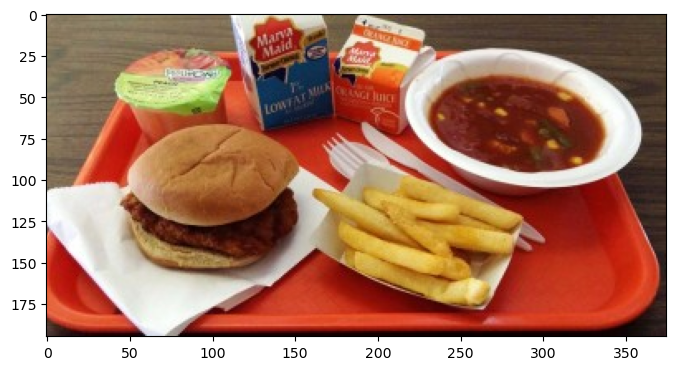

In [8]:
#`soup`, `borsch`, `trayfood`, `catburger`
img = Image.open('trayfood.jpg')
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.show()

In [9]:
# here we can set classes that are not
# in a well known datasets e.g. COCO
# and this is very cool

CLASSES = [
    'a photo of a salad',
    'a photo of a soup',
    'a photo of a hamburger',
    'a bowl with borsch',
    'a plate with soup',
    'burger with soup and fries',
    'burger with cat'
]

In [10]:
inputs = processor(
    text=CLASSES,
    images=img,
    return_tensors='pt',
    padding=True
)
outputs = model(**inputs)

# this is the image-text similarity score
logits_per_image = outputs.logits_per_image
# we can take the softmax to get the label probabilities
probs = logits_per_image.softmax(dim=1)
# resulting class
print('resulting class:', CLASSES[np.argmax(probs.detach().numpy())])

resulting class: burger with soup and fries


...with use of a `pipeline`:

In [11]:
from transformers import pipeline

In [12]:
def zeroshot(model_name, classes):
    classifier = pipeline('zero-shot-image-classification', model=model_name)
    scores = classifier(
        img,
        candidate_labels=CLASSES
    )
    print(
        f'highest score is {scores[0]["score"]:.2f}',
        f' for the label -{scores[0]["label"]}-'
    )
    return scores


scores = zeroshot(model_name, CLASSES)

/opt/conda/lib/python3.10/site-packages/transformers/utils/generic.py:339: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(


highest score is 0.98  for the label -burger with soup and fries-


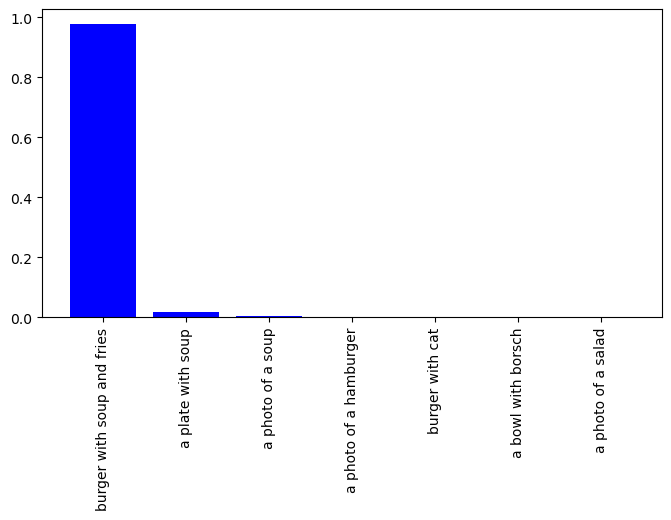

In [13]:
plt.figure(figsize=(8, 4))
plt.bar(
    [x['label'] for x in scores],
    [x['score'] for x in scores],
    color='b'
)
plt.xticks(rotation=90)
plt.show()

### 3. Mini-project

### <font color='red'>HOME ASSIGNMENT</font>

Imagine you are a computer vision engineer  and you have a project to make student canteen more digital. You are offered to deploy a CV model for meals classification. The canteen is free flow ыщ students have to take a tray with food and show it to camera. The camers takes a photo of a tray and display shows total price for a combo meal that is on a tray. Let's assume that there are limited number of meal sets available.

It seems like you better use ready zero-shot framework rather than collect images, label them and finetune model.

You task is as follows:
1. Define your own classes with `MEAL_CLASSES` variable, use this variable for zero-shot model. Five classes are enough for home assignment. One class will be for one set of meal (e.g. `hamburger with fries and juice`)
2. Collect at least one images for every class. Test that your model works well for every class (use function `zeroshot` from above)
3. Define a dictionary with prices for every class (set of meals). Create your own function to return a total price for the meals set that student take.
4. __(ADVANCED, NOT NECESSARY)__ Use image-from-text generated pipeline to test your work. Ask me for GPU if needed.

In [21]:
# HINT-1

MEAL_CLASSES = [
    'hamburger',
    'pasta',
    'borsch',
    'salad',
    'sushi'
]

In [22]:
img = Image.open('borsch.jpeg')
def zeroshot(model_name, classes):
    classifier = pipeline('zero-shot-image-classification', model=model_name)
    scores = classifier(
        img,
        candidate_labels=MEAL_CLASSES
    )
    print(
        f'highest score is {scores[0]["score"]:.2f}',
        f' for the label -{scores[0]["label"]}-'
    )
    return scores


scores = zeroshot(model_name, MEAL_CLASSES)

highest score is 1.00  for the label -borsch-


In [23]:
img = Image.open('pasta.jpeg')
def zeroshot(model_name, classes):
    classifier = pipeline('zero-shot-image-classification', model=model_name)
    scores = classifier(
        img,
        candidate_labels=MEAL_CLASSES
    )
    print(
        f'highest score is {scores[0]["score"]:.2f}',
        f' for the label -{scores[0]["label"]}-'
    )
    return scores


scores = zeroshot(model_name, MEAL_CLASSES)

highest score is 1.00  for the label -pasta-


In [24]:
img = Image.open('hamburger.jpeg')
def zeroshot(model_name, classes):
    classifier = pipeline('zero-shot-image-classification', model=model_name)
    scores = classifier(
        img,
        candidate_labels=MEAL_CLASSES
    )
    print(
        f'highest score is {scores[0]["score"]:.2f}',
        f' for the label -{scores[0]["label"]}-'
    )
    return scores


scores = zeroshot(model_name, MEAL_CLASSES)

highest score is 1.00  for the label -hamburger-


In [25]:
img = Image.open('salad.jpeg')
def zeroshot(model_name, classes):
    classifier = pipeline('zero-shot-image-classification', model=model_name)
    scores = classifier(
        img,
        candidate_labels=MEAL_CLASSES
    )
    print(
        f'highest score is {scores[0]["score"]:.2f}',
        f' for the label -{scores[0]["label"]}-'
    )
    return scores


scores = zeroshot(model_name, MEAL_CLASSES)

highest score is 1.00  for the label -salad-


In [26]:
img = Image.open('suchi.jpeg')
def zeroshot(model_name, classes):
    classifier = pipeline('zero-shot-image-classification', model=model_name)
    scores = classifier(
        img,
        candidate_labels=MEAL_CLASSES
    )
    print(
        f'highest score is {scores[0]["score"]:.2f}',
        f' for the label -{scores[0]["label"]}-'
    )
    return scores


scores = zeroshot(model_name, MEAL_CLASSES)

highest score is 1.00  for the label -sushi-


In [27]:
# HINT-2

PRICES_RUR = {
    'hamburger': 300,
    'pasta': 250,
    'borsch':250,
    'salad':200,
    'sushi':350
}

In [28]:
def calculate_total_price(selected_meals, PRICES_RUR):
    total_price = sum([PRICES_RUR[meal] for meal in selected_meals])
    return total_price

In [29]:
def zeroshot(model_name, classes):
    classifier = pipeline('zero-shot-image-classification', model=model_name)
    scores = classifier(
        img,
        candidate_labels=MEAL_CLASSES
    )
    print(
        f'highest score is {scores[0]["score"]:.2f}',
        f' for the label -{scores[0]["label"]}-'
    )
    return scores

In [34]:
meal = []
while True:   
    m = input("which dishes do you want to choose?")
    if m != 'no':
        meal.append(m)
    else:
        break
    n = input("Anything else or that's all?")
    if n != 'no':
        meal.append(n)
    else:
        break

which dishes do you want to choose? hamburger
Anything else or that's all? pasta
which dishes do you want to choose? no


In [35]:
print(meal)

['hamburger', 'pasta']


In [42]:
for i in meal:
    img = Image.open(i  + '.jpeg')
    scores = zeroshot(model_name, MEAL_CLASSES)

for j in scores:
    for i in meal:
        if j['label'] == i:
            total_price = calculate_total_price(meal, PRICES_RUR)
print(f"Total price for selected meal sets: R{total_price:.2f}")

highest score is 1.00  for the label -hamburger-
highest score is 1.00  for the label -pasta-
Total price for selected meal sets: R550.00
